# Exploratory Data Analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

## Import csv, create dataframe, and examine data as is.

In [2]:
df = pd.read_csv('fundamental_data.csv')

In [3]:
# scale features so that ratios are no long decimals
df['dividend_payout_ratio'] = df['dividend_payout_ratio']*100
df['g_revenue'] = df['g_revenue']*100
df['gross_margin'] = df['gross_margin_pct']*100
df['ebitda_margin'] = df['ebitda_margin_pct']*100
df['return_on_assets'] = df['return_on_assets']*100
df['return_on_equity'] = df['return_on_equity']*100
df['fifty_two'] = df['52_week_delta'].map(lambda x: float(x))

# drop columns that are no longer needed
df.drop(['52_week_delta', 'ticker', 'company_name', 'gross_margin_pct', 'ebitda_margin_pct', 'largest_institutional_owner'], axis=1, inplace=True)

print(df.shape)
df.head(10)

(2354, 13)


,market_cap,dividend_payout_ratio,forward_eps,g_revenue,price_to_forward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,recommendation,gross_margin,ebitda_margin,fifty_two
0,2.949712e+07,0.000000,1.15,74.9,4.261,0.772505,0.000,0.078000,2.515000,none,27.115000,0.544,-0.002066
1,4.671769e+08,0.000000,0.68,10.5,19.059,2.539682,52.765,4.989000,11.756000,buy,42.145002,6.150,0.061798
2,1.305030e+09,29.860002,3.55,9.7,14.411,1.604869,0.000,1.409000,11.557999,hold,0.000000,0.000,0.122633
3,1.430769e+09,0.000000,-1.09,43.8,-20.679,1.949153,42.584,-7.259000,-26.075000,hold,73.874000,-11.690,-0.602699
4,1.016644e+09,0.000000,0.09,-5.6,95.389,1.958257,19.777,-4.547000,-12.539000,hold,44.765000,-0.901,-0.252174
5,9.636705e+10,67.380000,9.69,-2.0,17.294,9.004353,189.511,10.052000,47.079000,hold,48.029000,24.773,-0.143657
6,1.784023e+09,0.000000,-0.26,27.8,-68.462,7.438362,126.820,-15.609999,-53.153000,buy,60.261000,-27.100,-0.048092
7,5.546277e+07,54.240000,0.45,-6.7,6.489,0.778667,31.485,-2.322000,15.215999,none,2.263000,2.263,-0.289157
8,6.206032e+09,36.670000,2.53,-3.4,17.897,4.459326,22.401,10.481000,23.737000,buy,40.032002,19.242,0.056086
9,4.877974e+08,0.000000,0.17,-12.7,37.353,4.770849,4.296,-5.398000,-19.358999,hold,77.000000,-4.811,-0.036050


In [4]:
df.tail(10)

,market_cap,dividend_payout_ratio,forward_eps,g_revenue,price_to_forward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,recommendation,gross_margin,ebitda_margin,fifty_two
2344,8.123269e+09,0.000000,0.69,-0.4,49.710,5.924007,475.913,3.543000,9.965000,hold,64.360000,45.269000,0.358446
2345,1.384758e+10,0.000000,14.09,3.5,18.226,8.193536,99.115,9.703000,33.712003,buy,47.291002,20.090000,0.493146
2346,8.297585e+09,0.000000,0.57,35.9,129.772,18.937532,134.114,-7.482000,-39.606000,buy,70.533997,-17.027001,0.282761
2347,5.925402e+09,0.000000,-1.14,117.2,-36.421,2.495042,70.948,-2.433000,-8.915000,hold,58.882000,-6.203000,0.132463
2348,2.987149e+10,0.000000,8.28,3.0,17.540,2.471495,71.299,3.506000,-0.760000,buy,71.570000,30.288000,0.309883
2349,8.507858e+09,29.040000,4.42,-1.0,11.292,1.224725,0.000,1.253000,11.406000,buy,0.000000,0.000000,0.142923
2350,3.656688e+08,0.000000,0.57,167.6,11.509,7.903615,128.831,1.271000,-2.314000,buy,59.814000,15.890999,0.101639
2351,5.847999e+10,20.459999,4.01,7.0,30.618,21.858643,248.544,11.706001,60.925996,buy,68.683000,39.285000,0.350000
2352,8.767421e+08,0.000000,2.56,4.3,13.293,2.169589,87.108,6.232000,14.028000,hold,34.630000,9.685001,0.854623
2353,5.798502e+09,0.000000,0.26,48.0,23.577,2.990244,36.721,-2.245000,2.587000,buy,60.100000,-2.404000,0.692308


In [5]:
df['recommendation'].value_counts()

buy             1276
hold             709
none             221
strong_buy       126
underperform      22
Name: recommendation, dtype: int64

In [6]:
df.isna().sum()

market_cap                   0
dividend_payout_ratio        0
forward_eps                  0
g_revenue                    0
price_to_forward_earnings    0
price_to_book                0
debt_to_equity               0
return_on_assets             0
return_on_equity             0
recommendation               0
gross_margin                 0
ebitda_margin                0
fifty_two                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
market_cap                   2354 non-null float64
dividend_payout_ratio        2354 non-null float64
forward_eps                  2354 non-null float64
g_revenue                    2354 non-null float64
price_to_forward_earnings    2354 non-null float64
price_to_book                2354 non-null float64
debt_to_equity               2354 non-null float64
return_on_assets             2354 non-null float64
return_on_equity             2354 non-null float64
recommendation               2354 non-null object
gross_margin                 2354 non-null float64
ebitda_margin                2354 non-null float64
fifty_two                    2354 non-null float64
dtypes: float64(12), object(1)
memory usage: 239.2+ KB


### Other cleaning needed

#### Steps taken:
1. Drop the 2 companies that have 'inf' for 52_week_change. This is because they became public this year and are too young for proper analyst recommendations. We will also set some feature limits


2. Take the log of market cap given its scale relative to the other features. Drop original market cap column

3. Standardize numerical data (except log_mktcap)

4. Inspect DF

In [8]:
# step 1
df['fifty_two'] = df['fifty_two']*100
df = df[(df['fifty_two'] != np.inf) &
        ((df['dividend_payout_ratio'] <= 100) & (df['dividend_payout_ratio'] >= 0)) &
        (df['price_to_book'] >= 0) &
        (df['debt_to_equity'] >= 0) &
#         ((df['forward_eps'] <= 100) & (df['forward_eps'] >= -100)) &
#         ((df['price_to_forward_earnings'] <= 2000) & (df['price_to_forward_earnings'] >= -2000)) &
#         (df['g_revenue'] <= 1000) &
        (df['gross_margin'] >= -100)
       ]

# step 2
df['log_mktcap'] = np.log(df['market_cap'])
df.drop(['market_cap'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

#step 3
std = StandardScaler()
unscaled_data = df[['recommendation']]
data_to_be_scaled = df.drop(['recommendation'], axis=1)
columns = data_to_be_scaled.columns
scaled_data = pd.DataFrame(std.fit_transform(data_to_be_scaled), columns=columns)
df = pd.concat([unscaled_data, scaled_data], axis=1)

# step 4
print(df.shape)
df.head()

(2128, 13)


,recommendation,dividend_payout_ratio,forward_eps,g_revenue,price_to_forward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,gross_margin,ebitda_margin,fifty_two,log_mktcap
0,none,-0.725904,-0.284997,0.440328,-0.097972,-0.350856,-0.121907,-0.133185,0.003212,-0.376355,-0.364976,-0.279852,-1.947259
1,buy,-0.725904,-0.357357,-0.038458,-0.001509,-0.190030,-0.083103,0.304732,0.112548,0.162890,-0.165472,-0.142119,-0.615686
2,hold,0.499245,0.084498,-0.044405,-0.031808,-0.275105,-0.121907,-0.014499,0.110206,-1.349186,-0.384336,-0.010917,-0.120507
3,hold,-0.725904,-0.629860,0.209113,-0.260548,-0.243772,-0.090590,-0.787431,-0.335056,1.301262,-0.800354,-1.575218,-0.076167
4,hold,-0.725904,-0.448191,-0.158154,0.496062,-0.242944,-0.107363,-0.545600,-0.174902,0.256891,-0.416400,-0.819251,-0.240880


In [9]:
df.tail()

,recommendation,dividend_payout_ratio,forward_eps,g_revenue,price_to_forward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,gross_margin,ebitda_margin,fifty_two,log_mktcap
2123,buy,0.465600,0.218440,-0.123955,-0.052139,-0.309701,-0.121907,-0.028410,0.108407,-1.349186,-0.384336,0.032841,0.783189
2124,buy,-0.725904,-0.374292,1.129511,-0.050725,0.298129,-0.027163,-0.026804,-0.053923,0.796818,0.181186,-0.056194,-0.733774
2125,buy,0.113565,0.155318,-0.064479,0.073841,1.568144,0.060875,0.903692,0.694313,1.115019,1.013721,0.479437,1.712399
2126,hold,-0.725904,-0.067919,-0.084552,-0.039096,-0.223711,-0.057847,0.415572,0.139430,-0.106732,-0.039670,1.567742,-0.312245
2127,buy,-0.725904,-0.422019,0.240338,0.027943,-0.149025,-0.094902,-0.340329,0.004064,0.807079,-0.469888,1.217681,0.598382


In [10]:
labels = ['log_mktcap',
          'dividend_payout_ratio',
          'fifty_two',
          'forward_eps',
          'g_revenue',
          'gross_margin',
          'ebitda_margin',
          'price_to_forward_earnings',
          'price_to_book',
          'debt_to_equity',
          'return_on_assets',
          'return_on_equity']

In [11]:
print('Statistical Summary of Continuous Variables')
print('--'*40)
print(df[labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables
--------------------------------------------------------------------------------
                            count          mean       std        min  \
log_mktcap                 2128.0 -6.271091e-16  1.000235  -4.243135   
dividend_payout_ratio      2128.0 -1.220828e-17  1.000235  -0.725904   
fifty_two                  2128.0  1.554730e-17  1.000235  -2.386659   
forward_eps                2128.0 -2.819904e-17  1.000235  -2.705192   
g_revenue                  2128.0  5.921537e-18  1.000235  -0.857746   
gross_margin               2128.0 -1.180134e-16  1.000235  -4.588462   
ebitda_margin              2128.0 -4.134642e-17  1.000235 -10.185326   
price_to_forward_earnings  2128.0 -2.298998e-17  1.000235 -15.881411   
price_to_book              2128.0  1.169960e-17  1.000235  -0.420800   
debt_to_equity             2128.0 -9.847490e-18  1.000235  -0.121907   
return_on_assets           2128.0  7.408443e-18  1.000235 -11.539371   
return_on_e

## Visualize our data

### Target Varaible

In [12]:
# Analyst Rating Count
print('Target Variable')
print(df.groupby(['recommendation']).recommendation.count())

Target Variable
recommendation
buy             1155
hold             631
none             204
strong_buy       118
underperform      20
Name: recommendation, dtype: int64


In [13]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')
print('--'*40)

print('Strong Buy')
print(df[df['recommendation'] == 'strong_buy'][labels].describe().transpose())
print('--'*40)


print('Buy')
print(df[df['recommendation'] == 'buy'][labels].describe().transpose())
print('--'*40)

print('Hold')
print(df[df['recommendation'] == 'hold'][labels].describe().transpose())
print('--'*40)

print('Underperformer')
print(df[df['recommendation'] == 'underperform'][labels].describe().transpose())
print('--'*40)

print('None')
print(df[df['recommendation'] == 'none'][labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
--------------------------------------------------------------------------------
Strong Buy
                           count      mean       std       min       25%  \
log_mktcap                 118.0 -0.621672  0.813355 -2.310925 -1.233924   
dividend_payout_ratio      118.0 -0.392360  0.733790 -0.725904 -0.725904   
fifty_two                  118.0 -0.009629  1.405982 -2.227466 -0.726424   
forward_eps                118.0 -0.272837  0.396355 -1.450447 -0.488990   
g_revenue                  118.0  0.188725  1.297921 -0.727641 -0.131018   
gross_margin               118.0  0.003802  1.031909 -4.465687 -0.668967   
ebitda_margin              118.0 -0.482743  1.410347 -7.942278 -0.384336   
price_to_forward_earnings  118.0 -0.072167  0.362272 -1.628573 -0.142940   
price_to_book              118.0 -0.066040  0.444472 -0.407636 -0.294299   
debt_to_equity             118.0 -0.068400  0.063081 -0.121907 -0.115190   
r

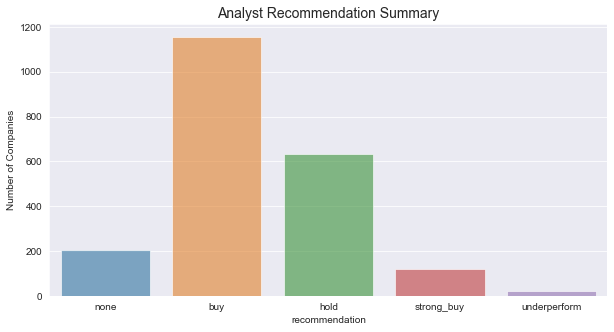

In [14]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['recommendation'], alpha =.6);
plt.title('Analyst Recommendation Summary', fontsize=14);
plt.ylabel('Number of Companies');
plt.show();

In [15]:
#group the strong buys with buys

buy_recos = ['buy', 'strong_buy']

df['analyst_rating'] = ''

for i in range(df.shape[0]):
    if df['recommendation'].iloc[i] in buy_recos:
        df['analyst_rating'].iloc[i] = 1
    else:
        df['analyst_rating'].iloc[i] = 0
df.drop('recommendation', axis=1, inplace=True)

In [16]:
# Analyst Rating Count
print("Target Variable (1 = 'Buy', 0 = 'Not_Buy')")
print(df.groupby(['analyst_rating']).analyst_rating.count())

Target Variable (1 = 'Buy', 0 = 'Not_Buy')
analyst_rating
0     855
1    1273
Name: analyst_rating, dtype: int64


In [17]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')
print('--'*40)

print('Buy')
print(df[df['analyst_rating'] == 1][labels].describe().transpose())
print('--'*40)

print('Not_Buy')
print(df[df['analyst_rating'] == 0][labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
--------------------------------------------------------------------------------
Buy
                            count      mean       std        min       25%  \
log_mktcap                 1273.0  0.136236  0.999215  -4.243135 -0.511570   
dividend_payout_ratio      1273.0 -0.085822  0.951888  -0.725904 -0.725904   
fifty_two                  1273.0  0.126922  1.021805  -2.386659 -0.399114   
forward_eps                1273.0  0.043460  1.189325  -2.705192 -0.386609   
g_revenue                  1273.0  0.035917  0.941313  -0.857746 -0.126186   
gross_margin               1273.0  0.074748  1.037473  -4.574864 -0.666895   
ebitda_margin              1273.0 -0.035908  1.128951 -10.185326 -0.384336   
price_to_forward_earnings  1273.0 -0.010636  0.826047 -15.881411 -0.062876   
price_to_book              1273.0  0.068166  1.119756  -0.420121 -0.294513   
debt_to_equity             1273.0 -0.033148  0.187410  -0.121907

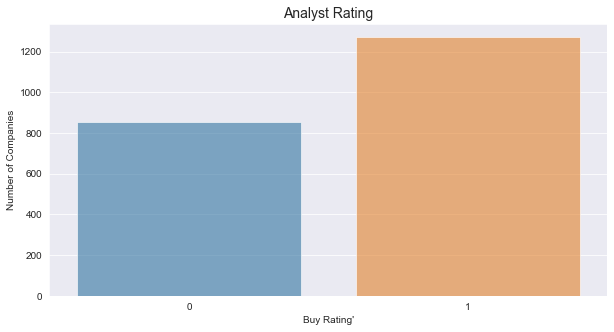

In [18]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['analyst_rating'], alpha =.6);
plt.title('Analyst Rating', fontsize=14);
plt.ylabel('Number of Companies');
plt.xlabel("Buy Rating'")
plt.show();

#### Examine Numerical Correlations

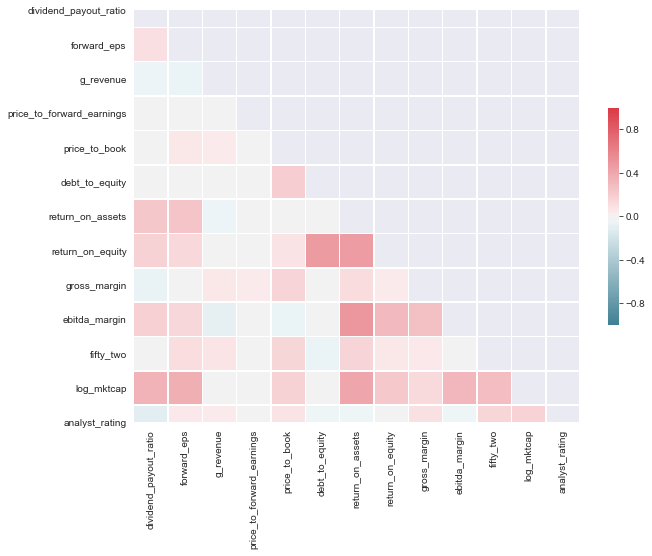

In [19]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

#create mask
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#create color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap,
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax);

### Continuous Variables

Let's visualize each continuous feature

#### Market Cap

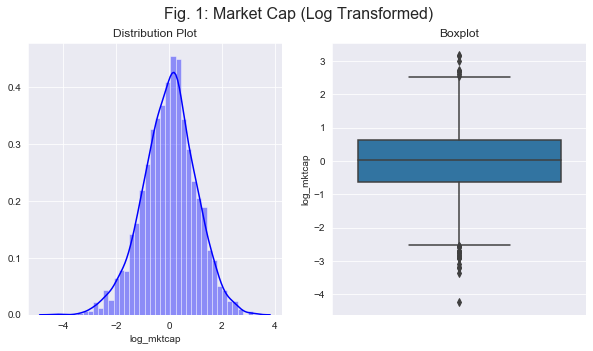

In [20]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 1: Market Cap (Log Transformed)', fontsize=16);

ax1 = fig.add_subplot(121);
sns.distplot(df['log_mktcap'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['log_mktcap'], orient='v');
ax2.set_title('Boxplot');

#### Dividend Payout Ratio

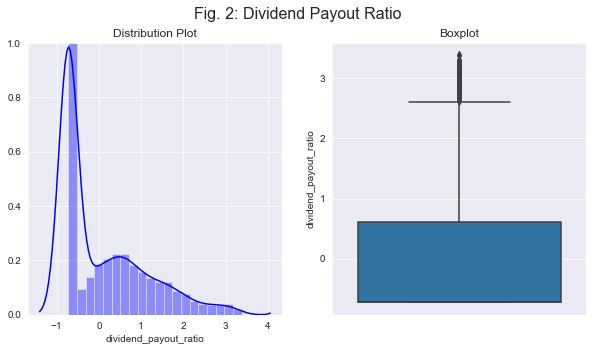

In [21]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 2: Dividend Payout Ratio', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['dividend_payout_ratio'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_ylim(0,1);

ax2 = fig.add_subplot(122);
sns.boxplot(df['dividend_payout_ratio'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Earnings Per Share

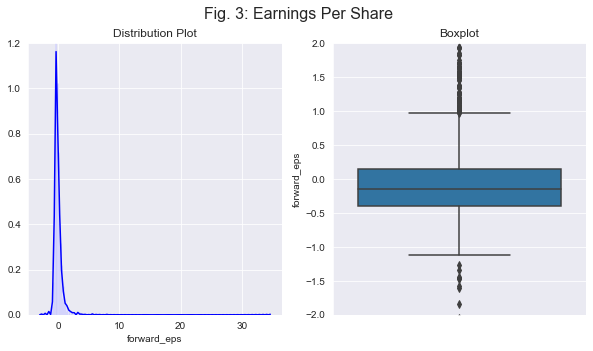

In [22]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 3: Earnings Per Share', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['forward_eps'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_ylim(0, 1.2);

ax2 = fig.add_subplot(122);
sns.boxplot(df['forward_eps'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-2,2);

#### Revenue Growth

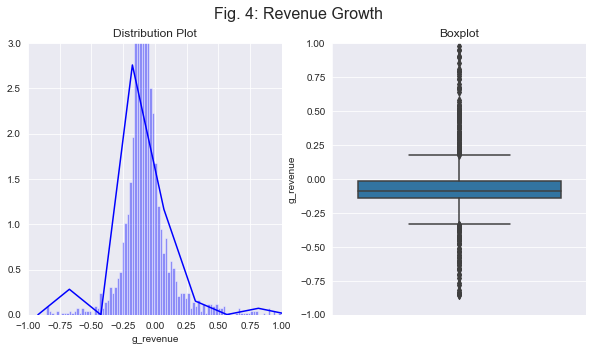

In [23]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 4: Revenue Growth', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['g_revenue'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_xlim(-1,1);
ax1.set_ylim(0,3);

ax2 = fig.add_subplot(122);
sns.boxplot(df['g_revenue'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-1,1);

#### Price to Earnings (P/E)

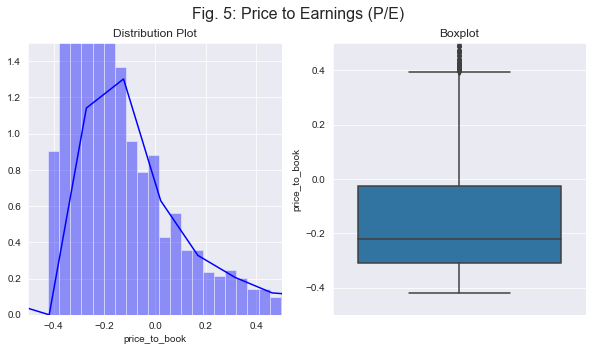

In [24]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 5: Price to Earnings (P/E)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_book'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_xlim(-0.5, 0.5);
ax1.set_ylim(0, 1.5);

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_book'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-0.5, 0.5);

#### Price to Book (P/B)

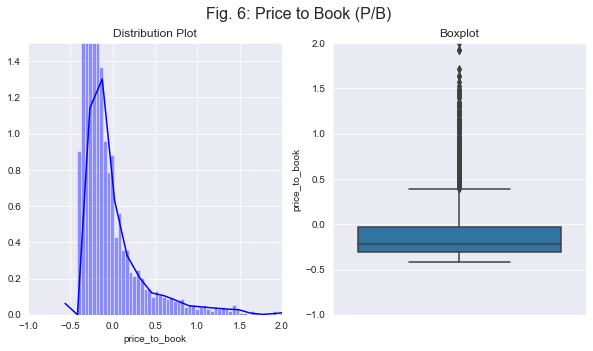

In [25]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 6: Price to Book (P/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_book'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_ylim(0, 1.5);
ax1.set_xlim(-1,2)

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_book'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-1,2);

#### Debt-to-Equity (D/B)

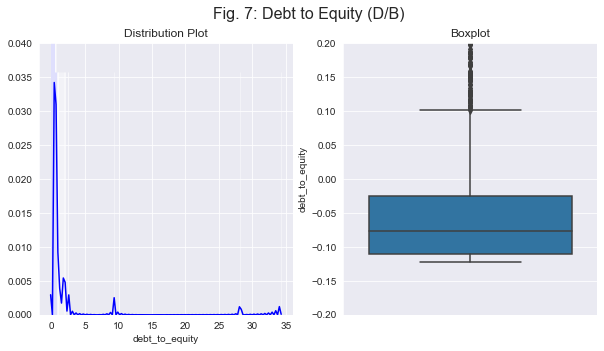

In [26]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 7: Debt to Equity (D/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['debt_to_equity'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_ylim(0, 0.04);

ax2 = fig.add_subplot(122);
sns.boxplot(df['debt_to_equity'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-0.2, 0.2);

### Margins

In [27]:
gross = df['gross_margin'].tolist()
ebitda = df['ebitda_margin'].tolist()

x = []
y = []

margins = [
    {
        'type' : 'gross',
        'data' : gross
    },
    {
        'type' : 'ebitda',
        'data' : ebitda
    }
]

for margin_type in margins:
    for i in range(len(gross)):
        x.append(margin_type['type'])
        y.append(margin_type['data'][i])

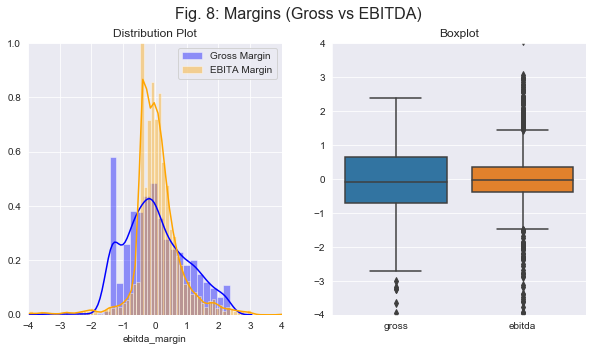

In [28]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 8: Margins (Gross vs EBITDA)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['gross_margin'], bins='auto', color='b', ax=ax1, label='Gross Margin');
sns.distplot(df['ebitda_margin'], bins='auto', color='orange', ax=ax1, label='EBITA Margin');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_ylim(0,1);
ax1.set_xlim(-4,4);

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-4,4);

#### Performance Metrics

In [29]:
fifty_two = df['fifty_two'].tolist()
roa = df['return_on_assets'].tolist()
roe = df['return_on_equity'].tolist()

x = []
y = []

performance_metrics = [
    {
        'type' : 'fifty_two',
        'data' : fifty_two
    },
    {
        'type' : 'roa',
        'data' : roa
    }
#     {
#         'type' : 'roe',
#         'data' : roe
#     }
]

for performance_metric in performance_metrics:
    for i in range(len(fifty_two)):
        x.append(performance_metric['type'])
        y.append(performance_metric['data'][i])

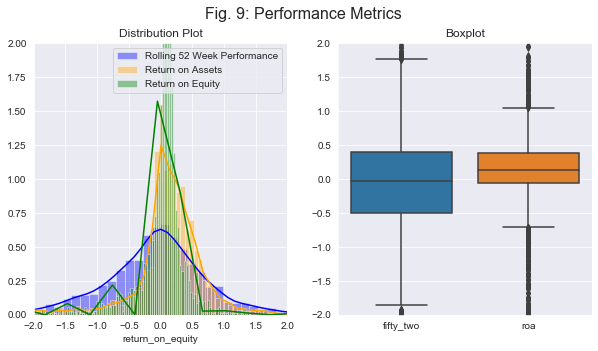

In [30]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 9: Performance Metrics', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['fifty_two'], bins='auto', color='b', ax=ax1, label='Rolling 52 Week Performance');
sns.distplot(df['return_on_assets'], bins='auto', color='orange', ax=ax1, label='Return on Assets');
sns.distplot(df['return_on_equity'], bins='auto', color='green', ax=ax1, label='Return on Equity');
ax1.set_title('Distribution Plot');
ax1.set_ylim(0, 2)
ax1.set_xlim(-2, 2)
ax1.legend();

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-2, 2);

In [31]:
# save dataframe to csv
df.to_csv('final_fundamental_data.csv', index=False)